In [14]:
import cv2

In [42]:
img = cv2.imread("cat.jpg")
print(img.shape)


(1602, 1200, 3)


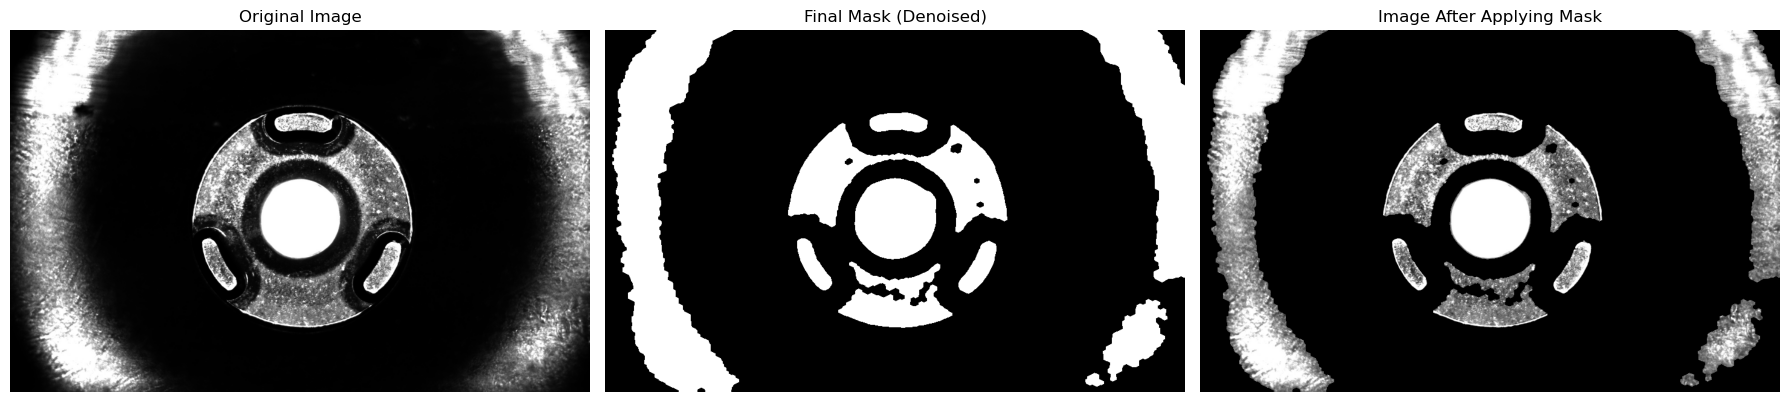

In [50]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload image
image_path = "4.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply strong Gaussian blur
strong_blur = cv2.GaussianBlur(gray, (9, 9), 0)

# Denoising and thresholding
_, strong_binary = cv2.threshold(strong_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
strong_morph = cv2.morphologyEx(strong_binary, cv2.MORPH_CLOSE, kernel, iterations=2)
strong_morph = cv2.morphologyEx(strong_morph, cv2.MORPH_OPEN, kernel, iterations=2)

# Apply mask to original image
masked_result = cv2.bitwise_and(img, img, mask=strong_morph)
masked_result_rgb = cv2.cvtColor(masked_result, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(img_rgb)
axes[0].set_title("Original Image")

axes[1].imshow(strong_morph, cmap='gray')
axes[1].set_title("Final Mask (Denoised)")

axes[2].imshow(masked_result_rgb)
axes[2].set_title("Image After Applying Mask")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


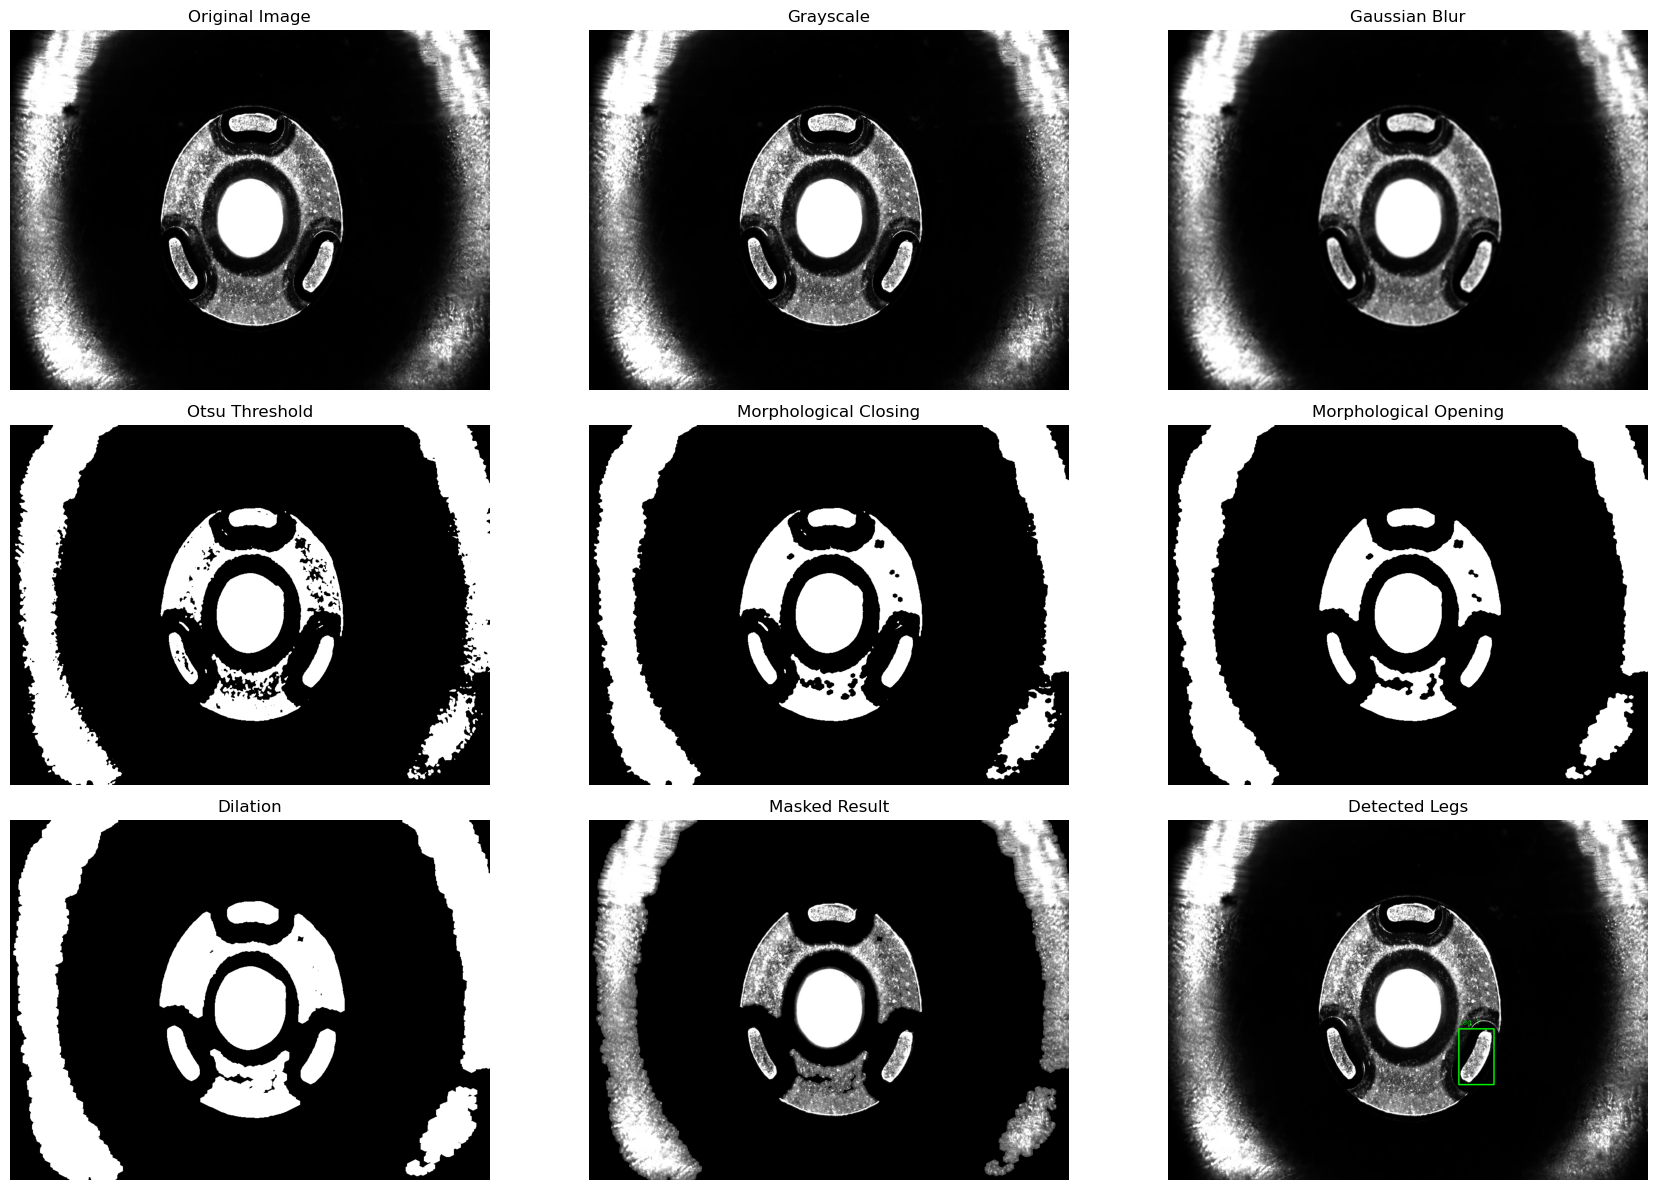

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and resize
img = cv2.imread("4.jpg")
img = cv2.resize(img, (1024, 768))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply strong Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 4)

# Step 4: Otsu's Thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Morphological Closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# Step 6: Morphological Opening
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 7: Dilation to ensure connected legs
dilated = cv2.dilate(opened, kernel, iterations=2)

# Step 8: Apply final mask to original image
masked = cv2.bitwise_and(img, img, mask=dilated)
masked_rgb = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

# Step 9: Find contours and draw bounding boxes
boxed_img = img.copy()
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
leg_id = 1
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 600 < area < 10000:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect = h / float(w)
        if 0.3 < aspect < 1.7 and y > img.shape[0] // 3:
            cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(boxed_img, f"Leg {leg_id}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            leg_id += 1
boxed_img_rgb = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Step 10: Visualize each stage
titles = [
    "Original Image", "Grayscale", "Gaussian Blur",
    "Otsu Threshold", "Morphological Closing",
    "Morphological Opening", "Dilation", "Masked Result", "Detected Legs"
]
images = [
    img_rgb, gray, blurred,
    binary, closed,
    opened, dilated, masked_rgb, boxed_img_rgb
]

# Display all steps in a grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for ax, img, title in zip(axes.ravel(), images, titles):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()


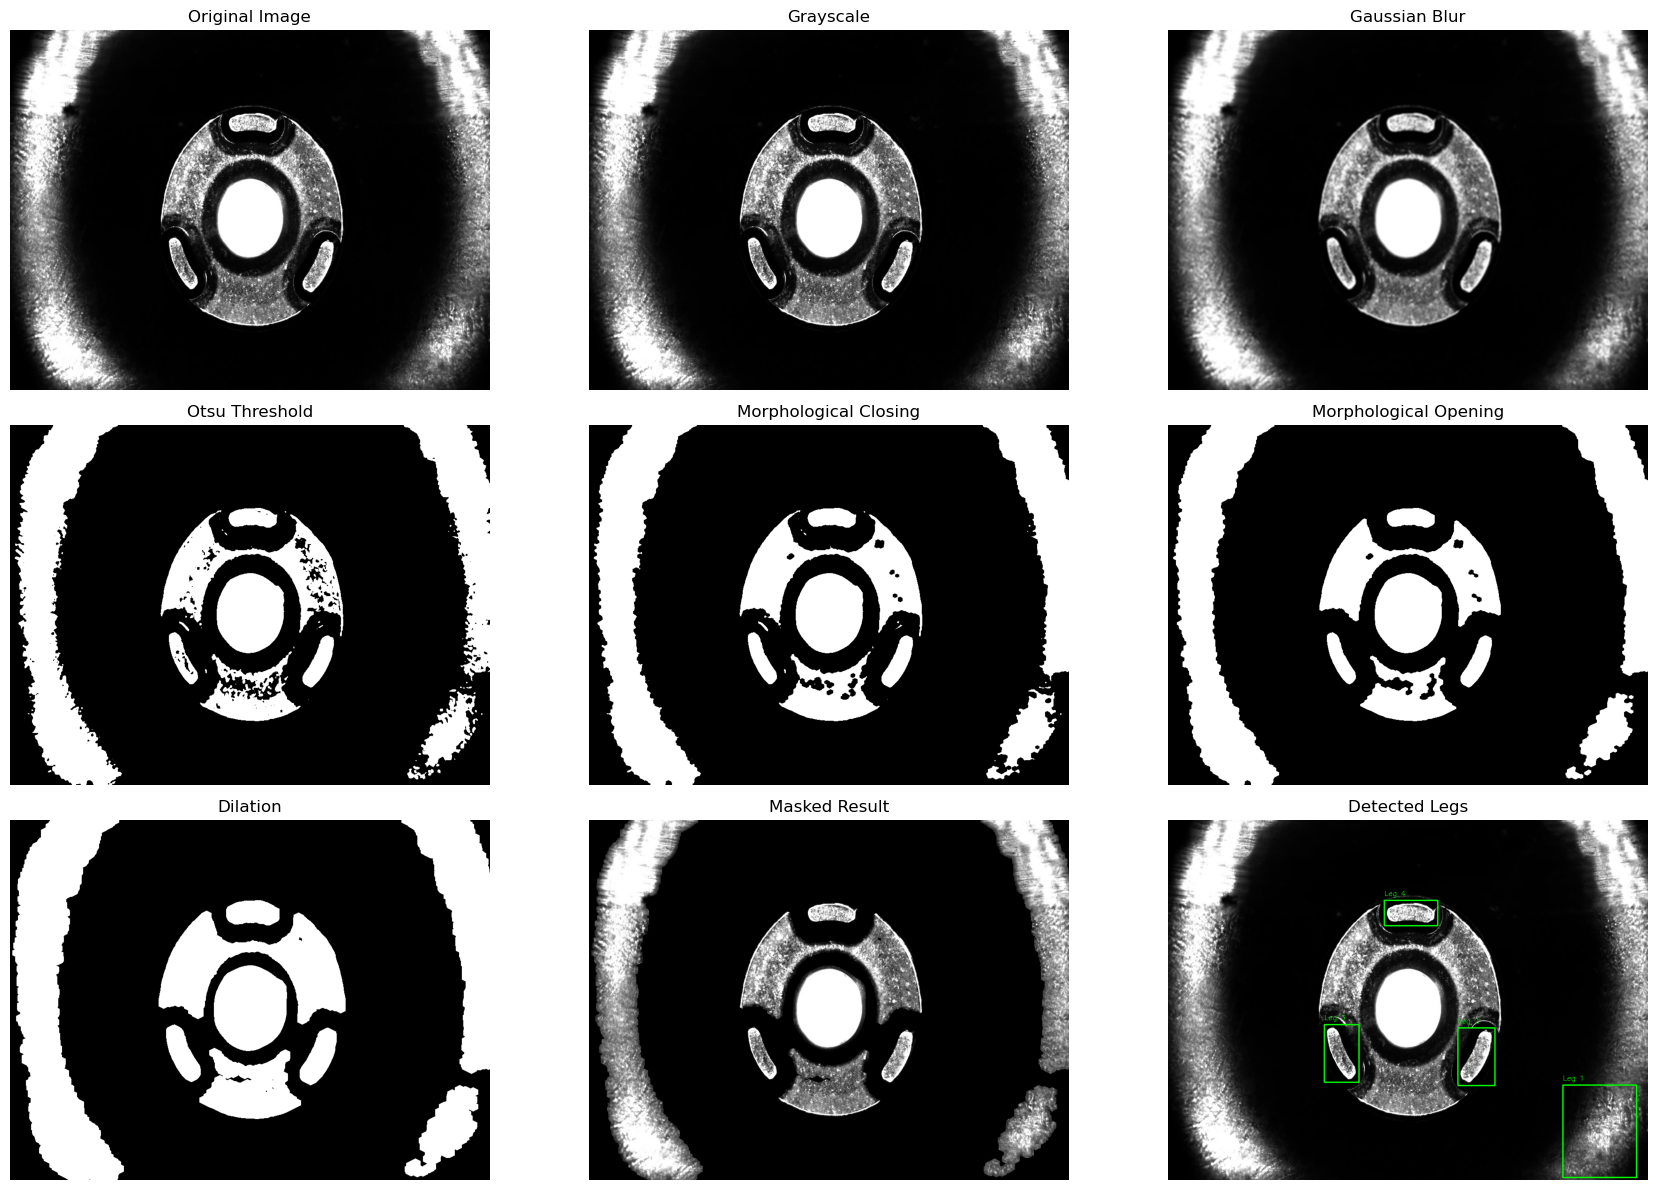

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and resize
img = cv2.imread("4.jpg")
img = cv2.resize(img, (1024, 768))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply strong Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 4)

# Step 4: Otsu's Thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Morphological Closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

# Step 6: Morphological Opening
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 7: Dilation — increase iteration to 3 for better connectivity
dilated = cv2.dilate(opened, kernel, iterations=3)

# Step 8: Apply final mask to original image
masked = cv2.bitwise_and(img, img, mask=dilated)
masked_rgb = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

# Step 9: Find contours and draw bounding boxes with relaxed filtering
boxed_img = img.copy()
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
leg_id = 1
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 500 < area < 15000:  # Loosened area constraint
        x, y, w, h = cv2.boundingRect(cnt)
        aspect = h / float(w)
        if 0.2 < aspect < 2.5:  # Loosened aspect ratio
            # Removed y > img.shape[0] // 3 to allow top legs too
            cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(boxed_img, f"Leg {leg_id}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            leg_id += 1
boxed_img_rgb = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Step 10: Visualize each stage
titles = [
    "Original Image", "Grayscale", "Gaussian Blur",
    "Otsu Threshold", "Morphological Closing",
    "Morphological Opening", "Dilation", "Masked Result", "Detected Legs"
]
images = [
    img_rgb, gray, blurred,
    binary, closed,
    opened, dilated, masked_rgb, boxed_img_rgb
]

# Display all steps in a grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for ax, img, title in zip(axes.ravel(), images, titles):
    if len(img.shape) == 2:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()


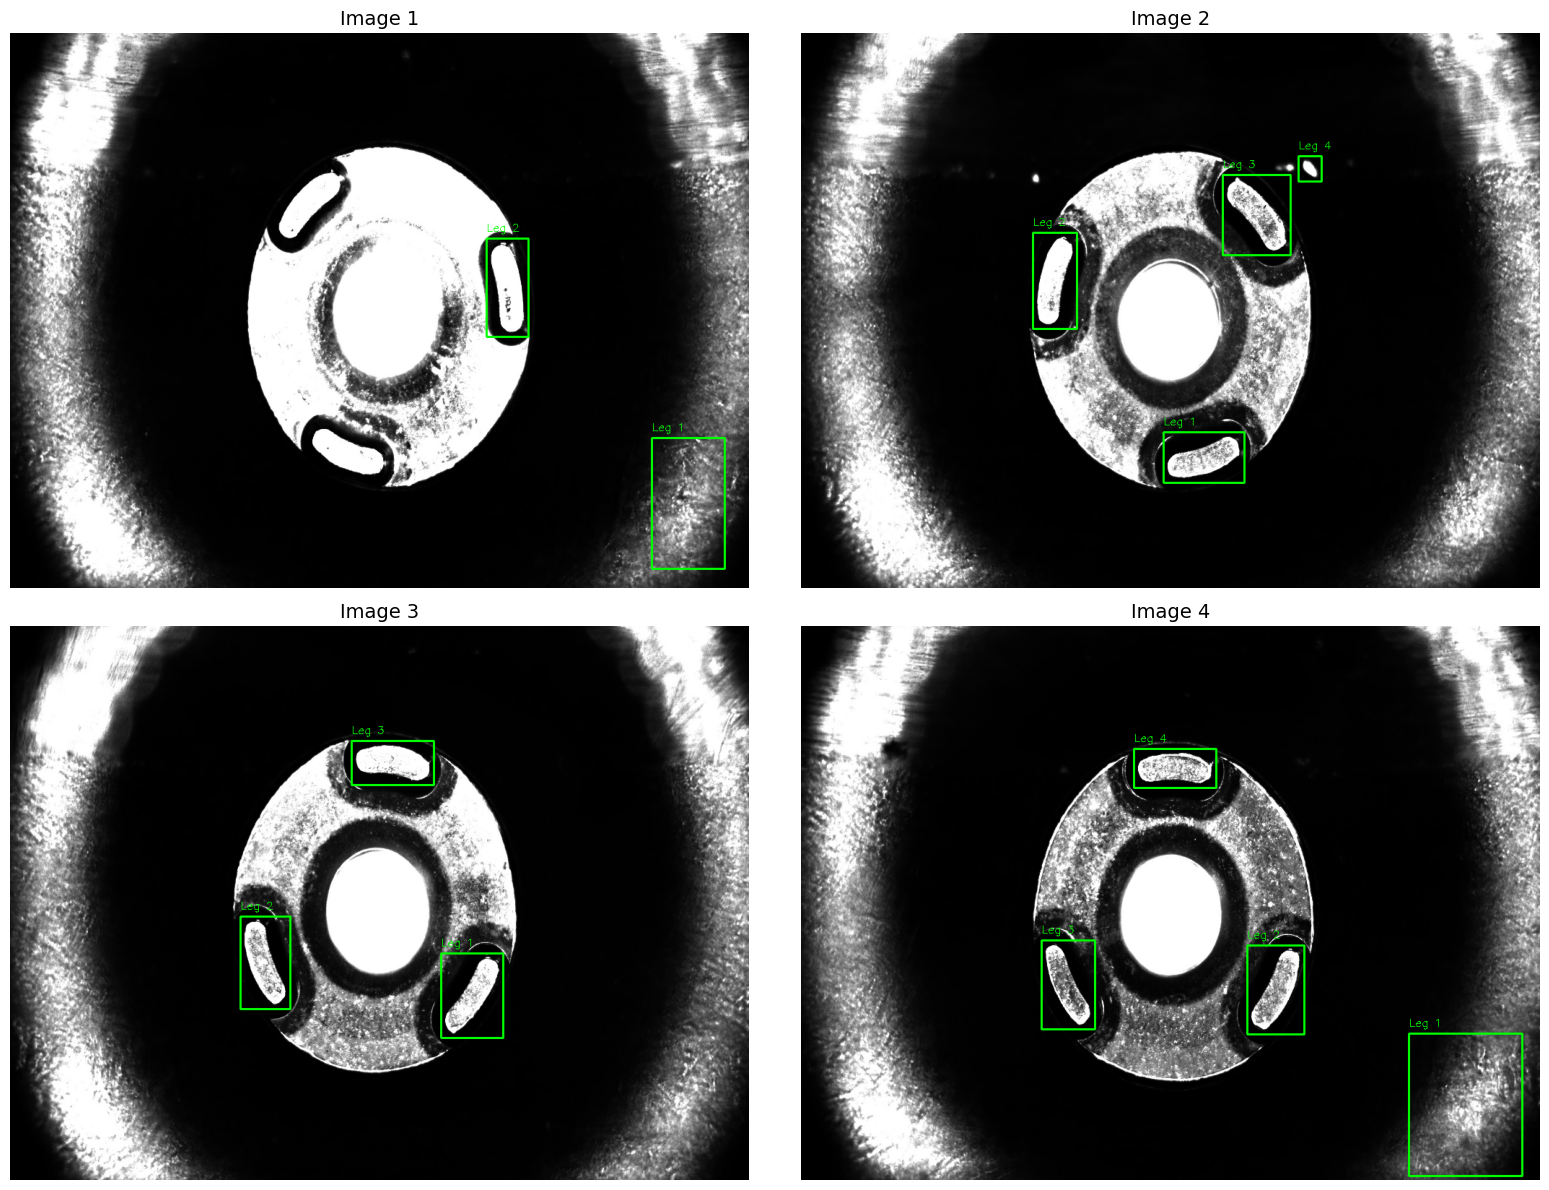

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# File paths for the 4 images
image_paths = [
    "1.jpg",
    "2.jpg",
    "3.jpg",
    "4.jpg"
]

# Store results for visualization
final_results = []

def process_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (1024, 768))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 4)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)
    dilated = cv2.dilate(opened, kernel, iterations=3)
    boxed_img = img.copy()
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leg_id = 1
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if 500 < area < 15000:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect = h / float(w)
            if 0.2 < aspect < 2.5:
                cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(boxed_img, f"Leg {leg_id}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                leg_id += 1
    return cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Process all 4 images
for path in image_paths:
    result = process_image(path)
    final_results.append(result)

# Display all final results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
titles = ["Image 1", "Image 2", "Image 3", "Image 4"]
for ax, img, title in zip(axes.ravel(), final_results, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


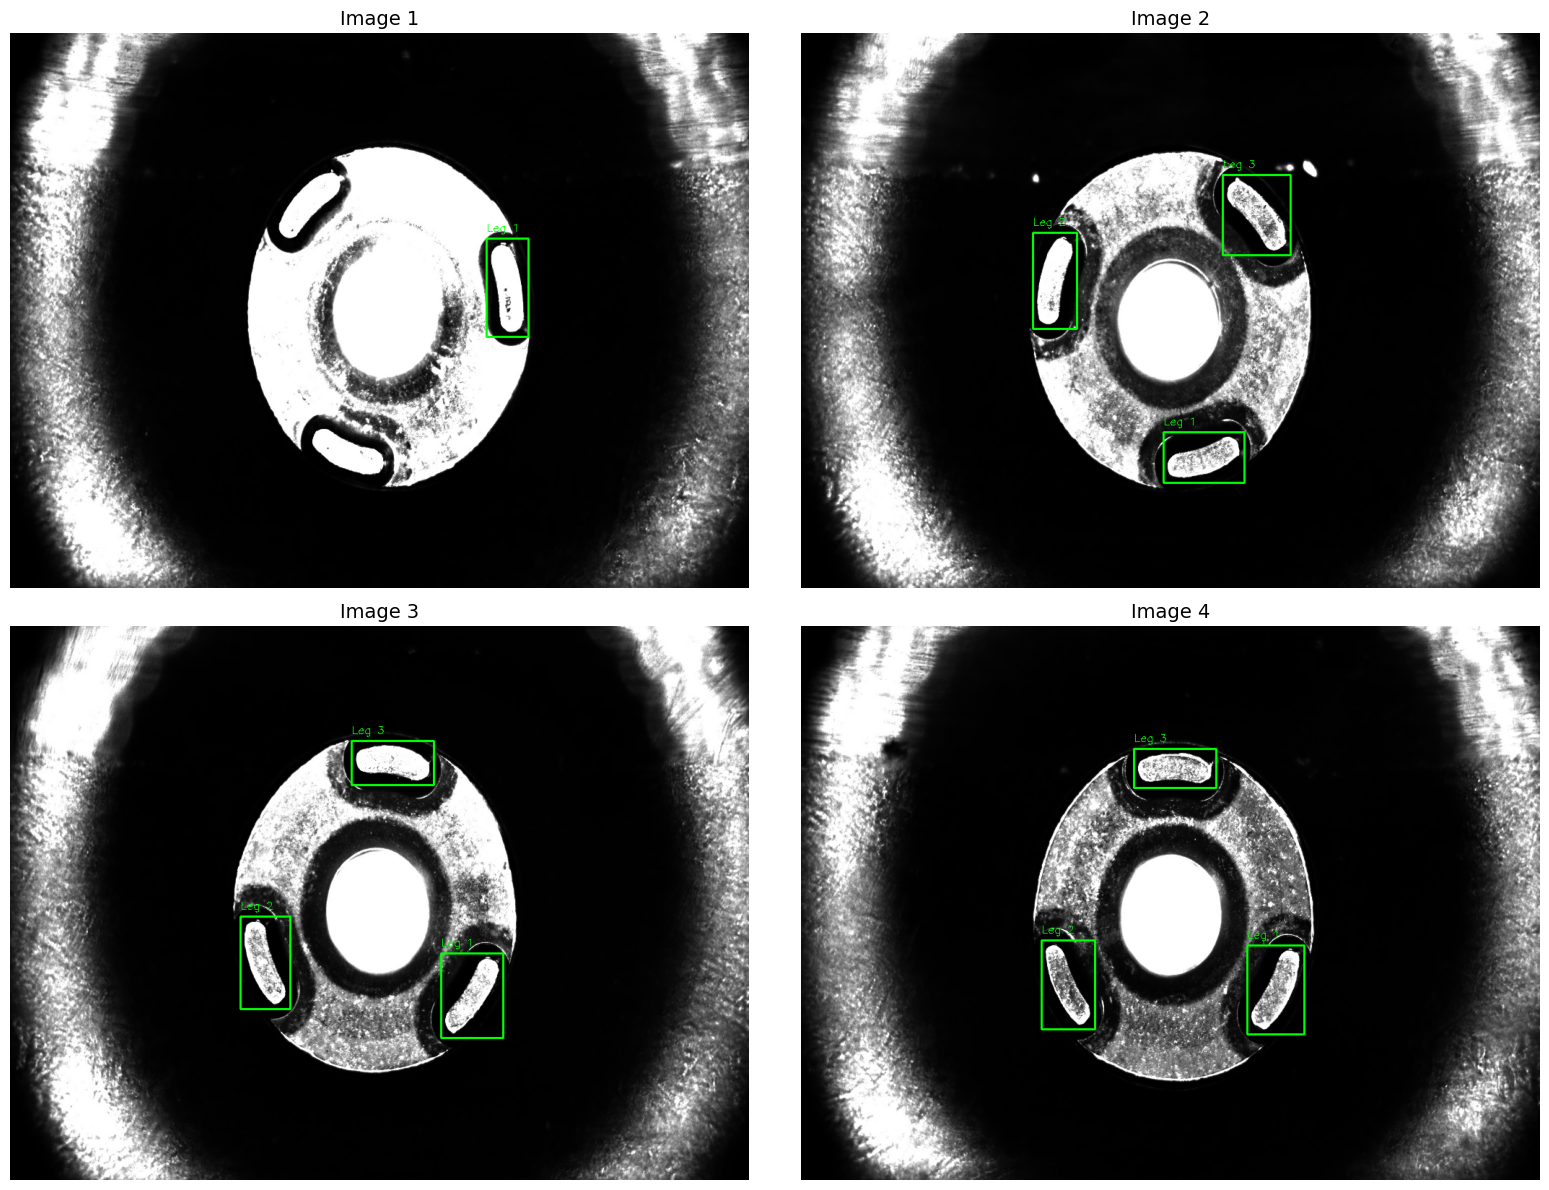

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image file names
image_paths = ["1.jpg", "2.jpg", "3.jpg", "4.jpg"]

def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (1024, 768))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 4)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)
    dilated = cv2.dilate(opened, kernel, iterations=3)

    boxed_img = img.copy()
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leg_id = 1

    # Image center
    cx, cy = img.shape[1] // 2, img.shape[0] // 2

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if 500 < area < 15000:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect = h / float(w)
            # Distance from center
            dist = np.sqrt((x + w / 2 - cx) ** 2 + (y + h / 2 - cy) ** 2)
            if 0.2 < aspect < 2.5 and 150 < dist < 250:
                cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(boxed_img, f"Leg {leg_id}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                leg_id += 1

    return cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Process all images
final_outputs = [process_image(img_name) for img_name in image_paths]

# Display results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
titles = ["Image 1", "Image 2", "Image 3", "Image 4"]
for ax, img, title in zip(axes.ravel(), final_outputs, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


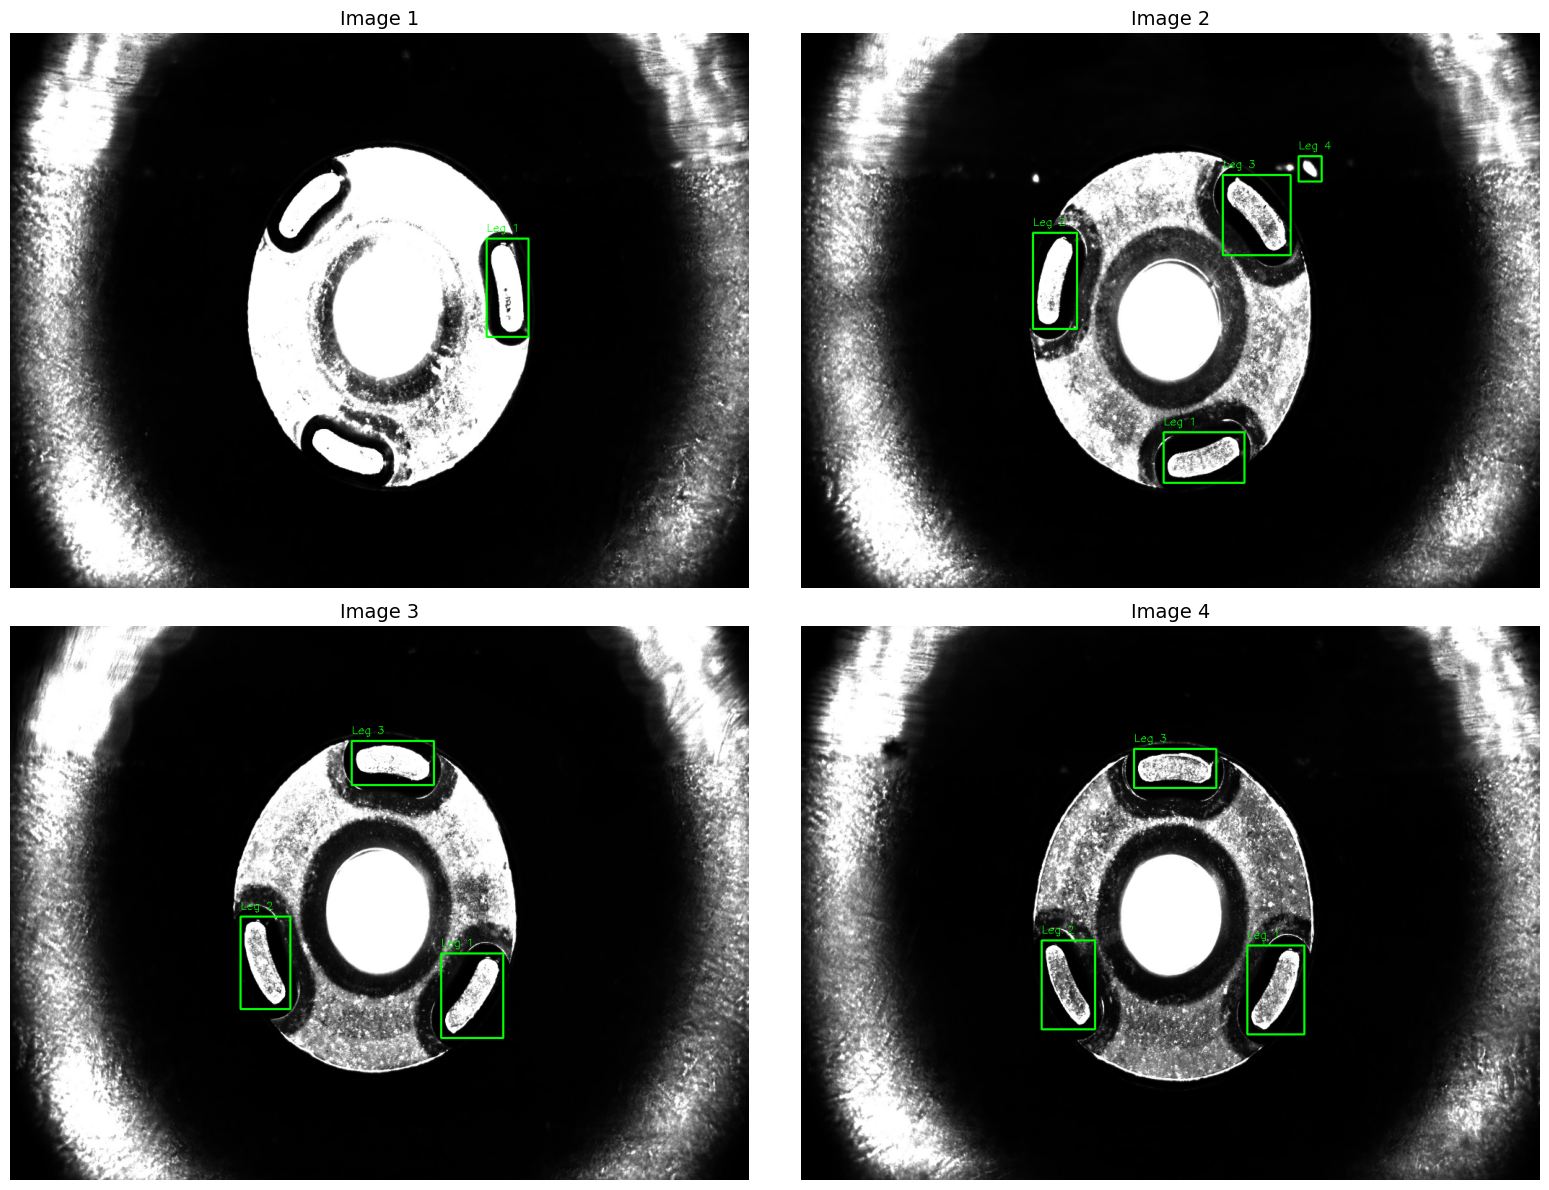

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image file paths
image_paths = ["1.jpg","2.jpg", "3.jpg", "4.jpg"]

# Process with new solidity + relaxed distance constraint
def process_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (1024, 768))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 4)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)
    dilated = cv2.dilate(opened, kernel, iterations=3)

    boxed_img = img.copy()
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leg_id = 1

    # Image center
    cx, cy = img.shape[1] // 2, img.shape[0] // 2

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if 500 < area < 15000:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect = h / float(w)

            # Solidity = contourArea / convexHullArea
            hull = cv2.convexHull(cnt)
            hull_area = cv2.contourArea(hull)
            solidity = area / hull_area if hull_area != 0 else 0

            # Distance from center
            dist = np.sqrt((x + w / 2 - cx) ** 2 + (y + h / 2 - cy) ** 2)

            if 0.2 < aspect < 2.5 and dist < 280 and solidity > 0.7:
                cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(boxed_img, f"Leg {leg_id}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                leg_id += 1

    return cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Apply to all 4 images
final_results = [process_image(p) for p in image_paths]

# Display results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
titles = ["Image 1", "Image 2", "Image 3", "Image 4"]
for ax, img, title in zip(axes.ravel(), final_results, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


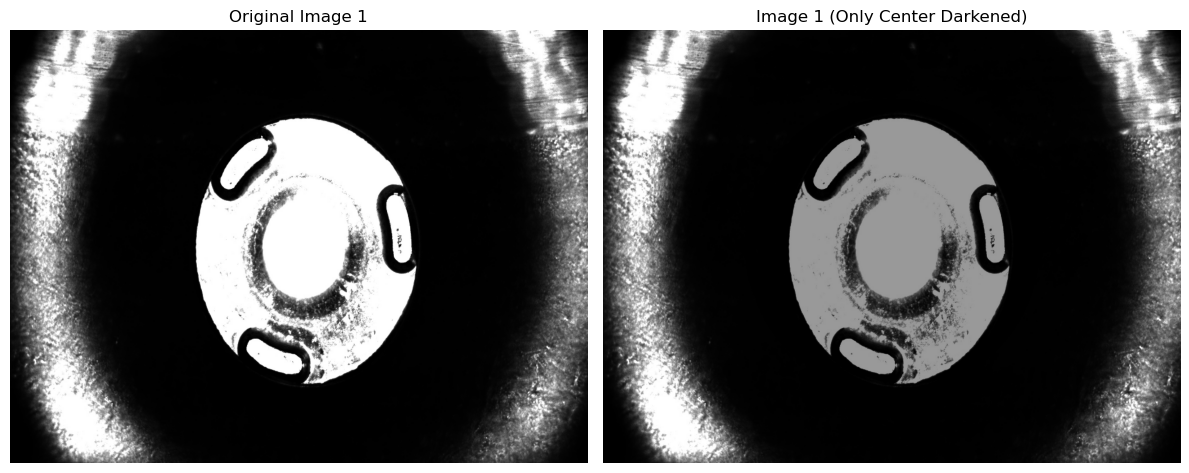

In [23]:
# Create a circular mask centered on the image to darken only the central region

# Reload original bright image to work from scratch
img_orig = cv2.imread("1.jpg")
img_orig = cv2.resize(img_orig, (1024, 768))
darkened_center = img_orig.copy()

# Create circular mask centered on the image
h, w = darkened_center.shape[:2]
cx, cy = w // 2, h // 2
radius = 260  # Radius big enough to cover the central disc area

mask = np.zeros((h, w), dtype=np.uint8)
cv2.circle(mask, (cx, cy), radius, 255, -1)  # white circle on black background

# Apply the mask: darken only the masked (circular) region
for c in range(3):  # For each channel (BGR)
    darkened_center[..., c] = np.where(
        mask == 255,
        (darkened_center[..., c] * 0.6).astype(np.uint8),  # darken
        darkened_center[..., c]
    )

# Show result
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image 1")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(darkened_center, cv2.COLOR_BGR2RGB))
axes[1].set_title("Image 1 (Only Center Darkened)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


  Area  AspectRatio                 Box
4911.0     0.669643 (413, 542, 112, 75)
5465.0     2.350877 (661, 285, 57, 134)


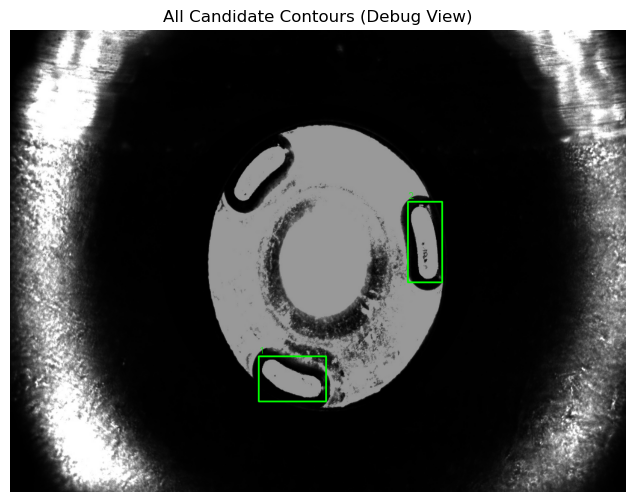

In [30]:
# Debug: Print area and aspect ratio of all detected contours (after dilation)
# and draw every contour that looks like a possible leg

gray = cv2.cvtColor(darkened_center, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 4)
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=2)
dilated = cv2.dilate(opened, kernel, iterations=3)

debug_img = darkened_center.copy()
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
leg_id = 1
contour_info = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect = h / float(w)

    # Collect all candidates, even borderline ones
    if 200 < area < 20000 and 0.1 < aspect < 5.0:
        contour_info.append((area, aspect, (x, y, w, h)))

        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, f"{leg_id}", (x, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        leg_id += 1

# Print summary of contour stats
import pandas as pd
df = pd.DataFrame(contour_info, columns=["Area", "AspectRatio", "Box"])
print(df.to_string(index=False))  # ✅ this replaces ace_tools.display_dataframe_to_user

# Show image with all candidate boxes
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
plt.title("All Candidate Contours (Debug View)")
plt.axis('off')
plt.show()

